# Regularization

In this notebook we will try out two different regularization techniques:

* L2 regularization, and
* drop-out

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import log_loss, f1_score, accuracy_score

from utils.data_utils import cluster_dataset_5, plot_decision_boundary

from networks import DeepNetworkReg

## Load data

Start by loading the synthesized data. The data contains two different clusters with nearly linear separation.

In [2]:
# Load cluster data
X_train, y_train, X_test, y_test = cluster_dataset_5()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2, 400)
y_train shape: (1, 400)
X_test shape: (2, 200)
y_test shape: (1, 200)


Text(0.5, 0, 'x1')

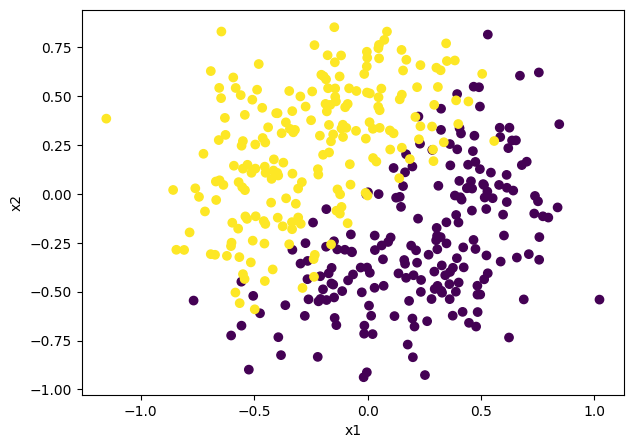

In [3]:
# Visualize training cluster
plt.figure(figsize=(7, 5))
plt.scatter(X_train[0, :], X_train[1, :], c=y_train)
plt.ylabel('x2')
plt.xlabel('x1')

Text(0.5, 0, 'x1')

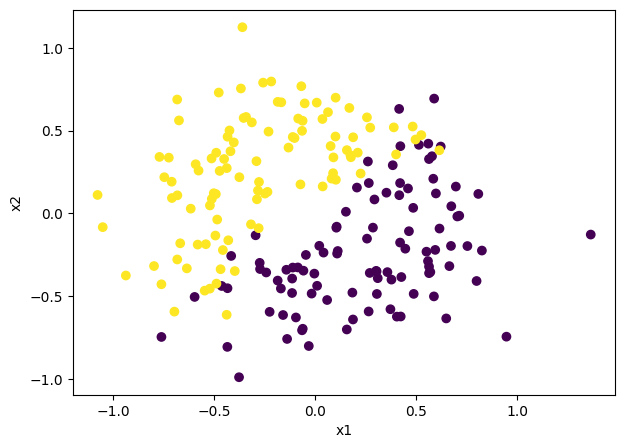

In [4]:
# Visualize test cluster
plt.figure(figsize=(7, 5))
plt.scatter(X_test[0, :], X_test[1, :], c=y_test)
plt.ylabel('x2')
plt.xlabel('x1')

In [5]:
# Define model architecture
layer_dims = [X_train.shape[0], 30, 15, 3, y_train.shape[0]]

## Model without regularization or drop-out

Start with training a model without regularization or drop-out and see how it performs.

In [6]:
# Instantiate model
model = DeepNetworkReg()

In [7]:
# Train model without regularization or drop-out
model.call(X_train, y_train, layer_dims, hidden_activation='relu',
           lbd=0.0,  # No regularization
           keep_prob=1.0,  # No drop-out
           num_iter=30000, learning_rate=0.4, print_cost=True)

Cost after iteration 0: 0.6633042342698124
Cost after iteration 10000: 0.15051996006863713
Cost after iteration 20000: 0.128130714636407
Cost after iteration 29999: 0.10650061604652775


Training data preformance:
Accuracy: 0.9575
Logloss: 0.10891349862713767
F1 score: 0.9582309582309583
Test data preformance:
Accuracy: 0.915
Logloss: 0.17640490758928146
F1 score: 0.916256157635468


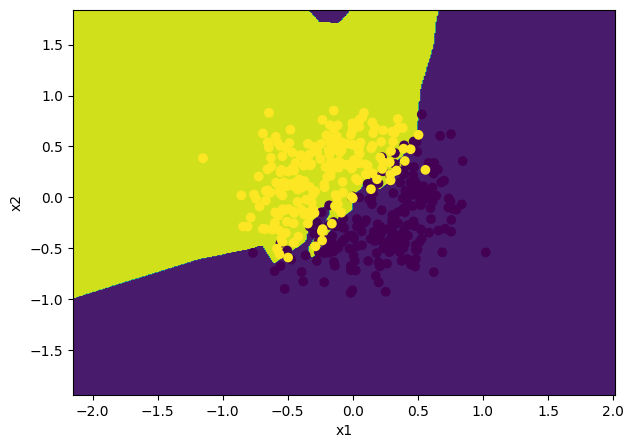

In [8]:
# Plot decision boundary
plot_decision_boundary(lambda x: model.predict(x.T), X_train, y_train)

# Performance metrics training set
y_pred = model.predict(X_train)
y_pred_proba = model.predict_proba(X_train)
y_pred_test = model.predict(X_test)
y_pred_proba_test = model.predict_proba(X_test)

print('Training data preformance:')
print(f'Accuracy: {accuracy_score(y_train.reshape(-1,), y_pred.reshape(-1,))}')
print(f'Logloss: {log_loss(y_train.reshape(-1,), y_pred_proba.reshape(-1,))}')
print(f'F1 score: {f1_score(y_train.reshape(-1,), y_pred.reshape(-1,))}')

print('Test data preformance:')
print(f'Accuracy: {accuracy_score(y_test.reshape(-1,), y_pred_test.reshape(-1,))}')
print(f'Logloss: {log_loss(y_test.reshape(-1,), y_pred_proba_test.reshape(-1,))}')
print(f'F1 score: {f1_score(y_test.reshape(-1,), y_pred_test.reshape(-1,))}')

Text(0.5, 1.0, 'Learning curve - No regularization')

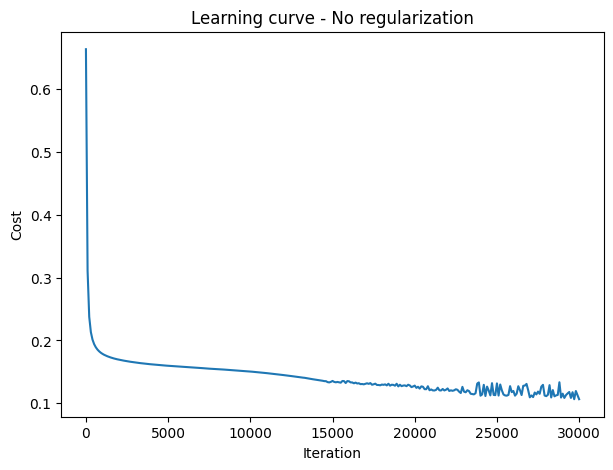

In [9]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(model.learning_curve[:, 0], model.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Learning curve - No regularization')

The model is overfitting on the training set.  
Let's try some regularization techniques and see if our model can generalize better to the test data.

## L2 regularization

Next, we will train the same model but this time we will add some L2 regularization.

In [10]:
# Instantiate model
model_l2 = DeepNetworkReg()

In [11]:
# Train model with L2 regularization
model_l2.call(X_train, y_train, layer_dims, hidden_activation='relu',
              lbd=0.7,  # Regularization
              keep_prob=1.0,  # No drop-out
              num_iter=30000, learning_rate=0.4, print_cost=True)

Cost after iteration 0: 0.737325023265537
Cost after iteration 10000: 0.19434077588656937
Cost after iteration 20000: 0.1933486680154974
Cost after iteration 29999: 0.19288698739725568


Training data preformance:
Accuracy: 0.9175
Logloss: 0.18175895379250367
F1 score: 0.9177057356608479
Test data preformance:
Accuracy: 0.92
Logloss: 0.17843740731102342
F1 score: 0.9207920792079208


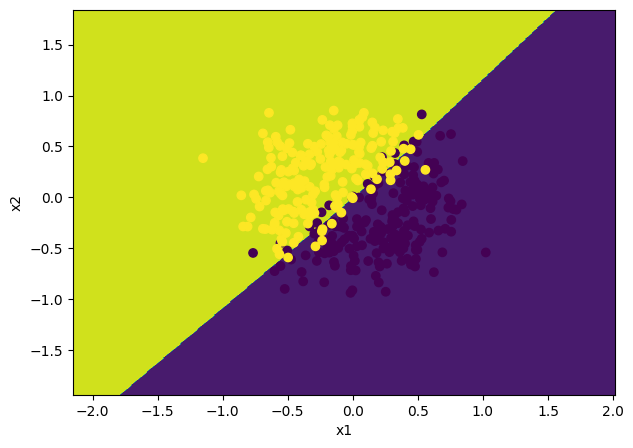

In [12]:
# Plot decision boundary
plot_decision_boundary(lambda x: model_l2.predict(x.T), X_train, y_train)

# Performance metrics training set
y_pred = model_l2.predict(X_train)
y_pred_proba = model_l2.predict_proba(X_train)
y_pred_test = model_l2.predict(X_test)
y_pred_proba_test = model_l2.predict_proba(X_test)

print('Training data preformance:')
print(f'Accuracy: {accuracy_score(y_train.reshape(-1,), y_pred.reshape(-1,))}')
print(f'Logloss: {log_loss(y_train.reshape(-1,), y_pred_proba.reshape(-1,))}')
print(f'F1 score: {f1_score(y_train.reshape(-1,), y_pred.reshape(-1,))}')

print('Test data preformance:')
print(f'Accuracy: {accuracy_score(y_test.reshape(-1,), y_pred_test.reshape(-1,))}')
print(f'Logloss: {log_loss(y_test.reshape(-1,), y_pred_proba_test.reshape(-1,))}')
print(f'F1 score: {f1_score(y_test.reshape(-1,), y_pred_test.reshape(-1,))}')

Text(0.5, 1.0, 'Learning curve - L2 regularization')

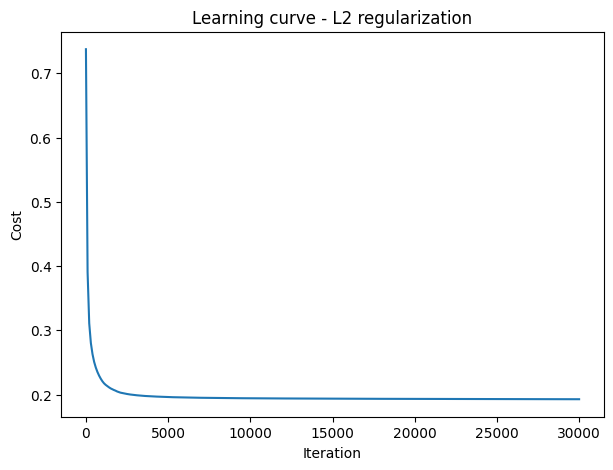

In [13]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(model_l2.learning_curve[:, 0], model_l2.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Learning curve - L2 regularization')

With L2 regularization the performance on the training set is decreased. However, the performance on the test set is much better. This shows that L2 regularization actually helps the model to generalize better!

## Drop-out

Next, we will train a model using drop-out instead of L2 regularization.

In [14]:
# Instantiate model
model_do = DeepNetworkReg()

In [15]:
# Train model with drop-out
model_do.call(X_train, y_train, layer_dims, hidden_activation='relu',
              lbd=0.0,  # No regularization
              keep_prob=0.80,  # Drop-out
              num_iter=30000, learning_rate=0.4, print_cost=True)

Cost after iteration 0: 0.6721892046738176
Cost after iteration 10000: 0.24778682135123134
Cost after iteration 20000: 0.21422899736402015
Cost after iteration 29999: 0.2884924636676478


Training data preformance:
Accuracy: 0.9325
Logloss: 0.22525542064869464
F1 score: 0.9343065693430656
Test data preformance:
Accuracy: 0.925
Logloss: 0.3196977547963129
F1 score: 0.9268292682926829


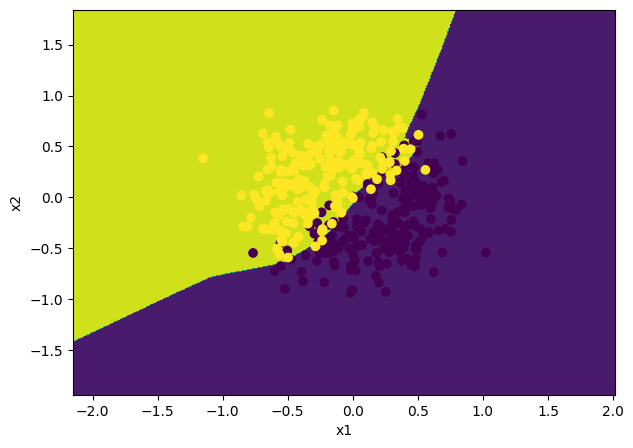

In [16]:
# Plot decision boundary
plot_decision_boundary(lambda x: model_do.predict(x.T), X_train, y_train)

# Performance metrics training set
y_pred = model_do.predict(X_train)
y_pred_proba = model_do.predict_proba(X_train)
y_pred_test = model_do.predict(X_test)
y_pred_proba_test = model_do.predict_proba(X_test)

print('Training data preformance:')
print(f'Accuracy: {accuracy_score(y_train.reshape(-1,), y_pred.reshape(-1,))}')
print(f'Logloss: {log_loss(y_train.reshape(-1,), y_pred_proba.reshape(-1,))}')
print(f'F1 score: {f1_score(y_train.reshape(-1,), y_pred.reshape(-1,))}')

print('Test data preformance:')
print(f'Accuracy: {accuracy_score(y_test.reshape(-1,), y_pred_test.reshape(-1,))}')
print(f'Logloss: {log_loss(y_test.reshape(-1,), y_pred_proba_test.reshape(-1,))}')
print(f'F1 score: {f1_score(y_test.reshape(-1,), y_pred_test.reshape(-1,))}')

Text(0.5, 1.0, 'Learning curve - Drop-out regularization')

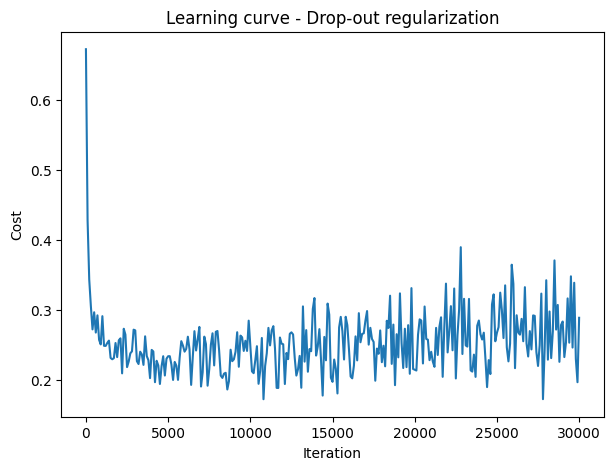

In [17]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(model_do.learning_curve[:, 0], model_do.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Learning curve - Drop-out regularization')

The model is performing better than the original one without drop-out. That is great!